In [ ]:
https://sites.google.com/view/senmitsu/%E6%B8%AC%E9%87%8F%E7%B3%BB/9-3-%E5%9B%9B%E8%A7%92%E5%BD%A2%E3%81%AE%E8%AA%BF%E6%95%B4

# 四辺形鎖



![](
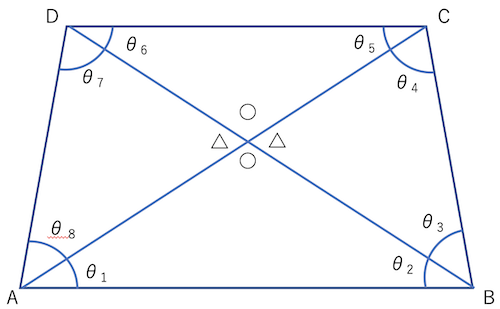
)

下記の表ではわかっているのは測定値だけ！

| 測定値 | 最確値 | 残差 |
| :--- | :--- | :--- |
| θ1(70'00') | M1 | v1(=M1-θ1) |
| θ2 | M2 | v2(=M2-θ2) |
| θ3 | M3 | v3(=M3-θ3) |
| θ4 | M4 | v4(=M4-θ4) |
| θ5 | M5 | v5(=M5-θ5) |
| θ6 | M6 | v6(=M6-θ6) |
| θ7 | M7 | v7(=M7-θ7) |
| θ8 | M8 | v8(=M8-θ8) |

In [ ]:
import math
from decimal import Decimal, ROUND_HALF_UP

def dms2deg(dms):
    # 度分秒から度への変換
    h = dms[0]
    m = dms[1]
    s = dms[2]
    deg = Decimal(str(h + (m / 60) + (s / 3600))).quantize(Decimal('0.0001'), rounding=ROUND_HALF_UP)
    return deg

def deg2dms(deg):
    # 度から度分秒への変換
    h = math.modf(deg)[1]
    m = math.modf(math.modf(deg)[0] * 60)[1]
    s = math.modf(math.modf(deg)[0] * 60)[0]*60
    if Decimal(str(s)).quantize(Decimal('0'), rounding=ROUND_HALF_UP) == 60:
        s = 0
        m = m + 1
    if Decimal(str(m)).quantize(Decimal('0'), rounding=ROUND_HALF_UP) == 60:
        m = 0
        h = h + 1
    dms_tap = (int(Decimal(h).quantize(Decimal('0'), rounding=ROUND_HALF_UP)),
                int(Decimal(m).quantize(Decimal('0'), rounding=ROUND_HALF_UP)),
                int(Decimal(s).quantize(Decimal('0'), rounding=ROUND_HALF_UP)))
    return dms_tap

print(dms2deg((30, 25, 40)))
print(deg2dms(30.4278))
print(dms2deg(deg2dms(30.4278)))

30.4278
(30, 25, 40)
30.4278


## 許容誤差の確認

In [ ]:
# 角ABCの測定値
theta1 = dms2deg((51, 20, 21))
theta2 = dms2deg((44, 59, 56))
theta3 = dms2deg((56, 18, 32))
theta4 = dms2deg((27, 21, 1))
theta5 = dms2deg((40, 1, 49))
theta6 = dms2deg((56, 18, 36))
theta7 = dms2deg((30, 57, 48))
theta8 = dms2deg((52, 41, 41))

print("三角の和")
print(theta1 + theta2 + theta3 + theta4)
print(theta5 + theta6 + theta7 + theta8)
print(theta1 + theta2 + theta7 + theta8)
print(theta5 + theta6 + theta3 + theta4)
print("=="*5)
print("三角の差")
print(deg2dms((180 - (theta1 + theta2 + theta3 + theta4))))
print(deg2dms((180 - (theta5 + theta6 + theta7 + theta8))))
print(deg2dms((180 - (theta1 + theta2 + theta7 + theta8))))
print(deg2dms((180 - (theta5 + theta6 + theta3 + theta4))))

三角の和
179.9973
179.9983
179.9961
179.9995
三角の差
(0, 0, 10)
(0, 0, 6)
(0, 0, 14)
(0, 0, 2)


# 制約条件

## 制約条件1：内角の和が360'

![](
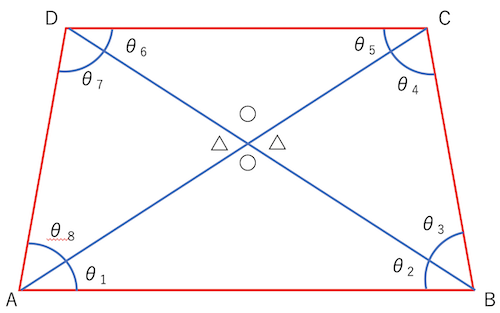
)

下記の表ではわかっているのは測定値だけ！

| 測定値 | 最確値 | 残差 |
| :--- | :--- | :--- |
| θ1(70'00') | M1 | v1(=M1-θ1) |
| θ2 | M2 | v2(=M2-θ2) |
| θ3 | M3 | v3(=M3-θ3) |
| θ4 | M4 | v4(=M4-θ4) |
| θ5 | M5 | v5(=M5-θ5) |
| θ6 | M6 | v6(=M6-θ6) |
| θ7 | M7 | v7(=M7-θ7) |
| θ8 | M8 | v8(=M8-θ8) |

制約式φ1

$
\begin{align}
    φ1 = M_1 + M_2 + M_3 + M_4 + M_5 + M_6 + M_7 + M_8 - 2π\\
    =  (θ_1 + v_1) + (θ_2 + v_2) + (θ_3 + v_3) + (θ_4 + v_4) \\
    + (θ_5 + v_5) + (θ_6 + v_6) + (θ_7 + v_7) + (θ_8 + v_8) \\
    = 0 \tag{1}
\end{align}
$

In [ ]:
from sympy import diff, symbols, solve

# 変数を定義(残差)
v1, v2, v3, v4, v5, v6, v7, v8 = symbols("v1 v2 v3 v4 v5 v6 v7 v8")

# 制約条件1(phi1)を定義
phi1 = (theta1+v1) + (theta2+v2) + (theta3+v3) + (theta4+v4) + (theta5+v5) + \
        (theta6+v6) + (theta7+v7) + (theta8+v8) - 360

## 制約条件2,3：対角が一致(○と△が一致)

![](
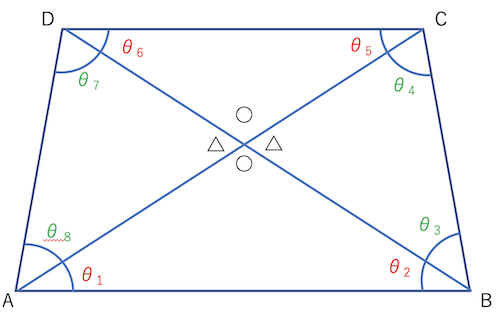
)

下記の表ではわかっているのは測定値だけ！

| 測定値 | 最確値 | 残差 |
| :--- | :--- | :--- |
| θ1(70'00') | M1 | v1(=M1-θ1) |
| θ2 | M2 | v2(=M2-θ2) |
| θ3 | M3 | v3(=M3-θ3) |
| θ4 | M4 | v4(=M4-θ4) |
| θ5 | M5 | v5(=M5-θ5) |
| θ6 | M6 | v6(=M6-θ6) |
| θ7 | M7 | v7(=M7-θ7) |
| θ8 | M8 | v8(=M8-θ8) |

制約式φ2

$
\begin{align}
    φ2 = M_1 + M_2 - M_5 - M_6\\
    =  (θ_1 + v_1) + (θ_2 + v_2) - (θ_5 + v_5) - (θ_6 + v_6) \\
    = 0 \tag{2}
\end{align}
$

制約式φ3

$
\begin{align}
    φ3 = M_3 + M_4 - M_7 - M_8\\
    =  (θ_3 + v_3) + (θ_4 + v_4) - (θ_7 + v_7) - (θ_8 + v_8) \\
    = 0 \tag{3}
\end{align}
$

In [ ]:
# 制約条件2(phi2)を定義(○)
phi2 = (theta1+v1) + (theta2+v2) - (theta5+v5) - (theta6+v6)

# 制約条件3(phi3)を定義(△)
phi3 = (theta3+v3) + (theta4+v4) - (theta7+v7) - (theta8+v8)

## 制約条件4:正弦定理の制約
**正弦定理**

![](
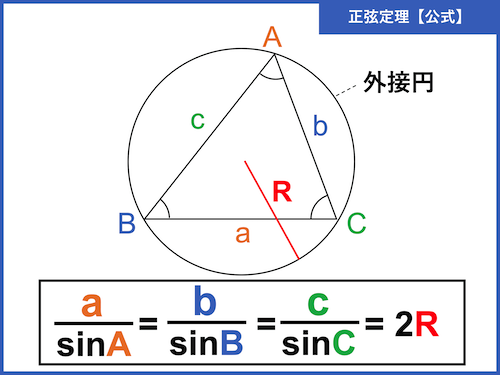
)

![](
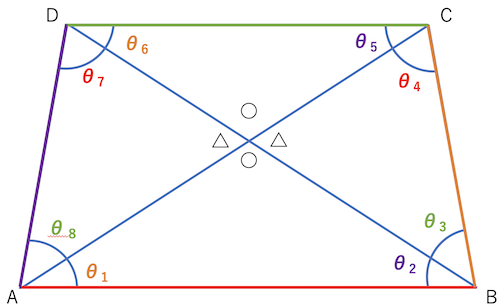
)

正弦定理より，下記の4式を作成する．(図でM(観測値)だが，式ではM(真値)としている)

$
    \begin{align}
   　△ABCにおいて   \frac{AB}{sinM_4} =  \frac{BC}{sinM_1} \\
   　△BCDにおいて   \frac{BC}{sinM_6} =  \frac{CD}{sinM_3} \\
   　△CDAにおいて   \frac{CD}{sinM_8} =  \frac{DA}{sinM_5} \\
   　△DABにおいて   \frac{DA}{sinM_2} =  \frac{AB}{sinM_7} \tag{3}
   \end{align}
$

式3を変形させると，下記のようになる

$
    \begin{align}
   　△ABCにおいて   \frac{AB}{BC} =  \frac{sinM_4}{sinM_1} \\
   　△BCDにおいて   \frac{BC}{CD} =  \frac{sinM_6}{sinM_3} \\
   　△CDAにおいて   \frac{CD}{DA} =  \frac{sinM_8}{sinM_5} \\
   　△DABにおいて   \frac{DA}{AB} =  \frac{sinM_2}{sinM_7} \tag{4}
   \end{align}
$

式4を変形させると，下記のようになる

$
    \begin{align}
     \frac{AB}{BC}  \frac{BC}{CD} \frac{CD}{DA} \frac{DA}{AB} =  \frac{sinM_4}{sinM_1} \frac{sinM_6}{sinM_3} \frac{sinM_8}{sinM_5} \frac{sinM_2}{sinM_7} = 1 \tag{5}
     \end{align}
$

式5を変形させると，下記のようになる

$
\begin{align}
    sinM_1  sinM_3 sinM_5 sinM_7 \\
    = sinM_2 sinM_4 sinM_6 sinM_8  \tag{6}
   \end{align}
$

式6では非線形なので，計算しやすいように線形化する

$
\begin{align}
    log(sinM_1) + log(sinM_3) + log(sinM_5) + log(sinM_7) = \\
    log(sinM_2) + log(sinM_4) + log(sinM_6) + log(sinM_8)
\end{align}
$

<br>

$
\begin{align}
    log(sin(θ_1 + v_1)) + log(sin(θ_3 + v_3) + log(sin(θ_5 + v_5)) + log(sin(θ_7 + v_7)) \\
    = log(sin(θ_2 + v_2)) + log(sin(θ_4 + v_4)) + log(sin(θ_6 + v_6)) + log(sin(θ_8 + v_8)) ) \tag{7}
\end{align}
$

<br>

θ(観測値)なので定数だが，v(誤差)は未知数でsinに入っていると，非線形になるので誤差計算がしづらい．

v(誤差)は，ごく僅かな値とみなして，テイラー展開を適用して，線形近似する(誤差は元々かなり小さいので，テイラー展開の2次項以降は無視している)

u=sinxとすると

$
\begin{align}
    log(sin(x + \Delta x)) \\
    = log(sinx) + \frac{d}{d x}log(sinx) \Delta x \\
    = log(sinx) + \frac{d}{d x}log(u) \Delta x \\
    = log(sinx) + \frac{d}{d x}log(u) \Delta x \\
    = log(sinx) + (\frac{d}{d u}log(u) \frac{du}{d x}) \Delta x \\
    = log(sinx) + (\frac{1}{u} \frac{du}{d x}) \Delta x \\
    = log(sinx) + (\frac{1}{sinx} \frac{d}{d x} sinx) \Delta x \\
    = log(sinx) + (\frac{cosx}{sinx} ) \Delta x \\
    = log(sinx) + (\frac{1}{tanx} ) \Delta x \\
    = log(sinx) + (cotx ) \Delta x ) \tag{8}
\end{align}
$

これより式7, 8より

$
\begin{align}
    φ_4 = log(sin(θ_1 + v_1)) + log(sin(θ_3 + v_3) + log(sin(θ_5 + v_5)) + log(sin(θ_7 + v_7)) - \\
    log(sin(θ_2 + v_2)) - log(sin(θ_4 + v_4)) - log(sin(θ_6 + v_6)) - log(sin(θ_8 + v_8)) \\
    = (log sinθ_1 + cotθ_1v_1) + (log sinθ_3 + cotθ_3v_3) + (log sinθ_5 + cotθ_5v_5) + (log sinθ_7 + cotθ_7v_7) - \\
    (log sinθ_2 + cotθ_2v_2) - (log sinθ_4 + cotθ_4v_4) - (log sinθ_6 + cotθ_6v_6) + (log sinθ_8 + cotθ_8v_8) \\
    = 0　 \tag{9}
\end{align}
$


# ラグランジュの未定乗数法

制約条件を満たしつつ，v(誤差)が最小になるようにする．

二乗誤差が最小になるようにして，前述の4つの制約条件を満たす「ラグランジュの未定乗数法」を解いていく．

微分の計算をしやすいように，制約には2λをかけてあげる．

$
\begin{align}
    φ_1 =  (θ_1 + v_1) + (θ_2 + v_2) + (θ_3 + v_3) + (θ_4 + v_4) \\
    +(θ_5 + v_5) + (θ_6 + v_6) + (θ_7 + v_7) + (θ_8 + v_8) -2π \\
    φ_2 = (θ_1 + v_1) + (θ_2 + v_2) - (θ_5 + v_5) - (θ_6 + v_6) \\
    φ_3 = (θ_3 + v_3) + (θ_4 + v_4) - (θ_7 + v_7) - (θ_8 + v_8) \\
    φ_4 = (log sinθ_1 + cotθ_1v_1) + (log sinθ_3 + cotθ_3v_3) + (log sinθ_5 + cotθ_5v_5) + (log sinθ_7 + cotθ_7v_7) - \\
    (log sinθ_2 + cotθ_2v_2) - (log sinθ_4 + cotθ_4v_4) - (log sinθ_6 + cotθ_6v_6) + (log sinθ_8 + cotθ_8v_8) \\
\end{align}
$

$
\begin{align}
    L = v_1^2 + v_2^2 + v_3^2 + v_4^2 + v_5^2 + v_6^2 + v_7^2 + v_8^2 + \\
    2 \lambda_1 φ_1 + 2 \lambda_2 φ_2 + 2 \lambda_3 φ_3 + 2 \lambda_1 φ_4 \tag{10}
\end{align}
$

ラグランジュ関数Lを最小化になるλを求めて，現状で最小となるv(誤差)を求める．

最小化は微分して，0となる数値とする．

$
\begin{align}
    \frac{1}{2} \frac{d L}{d v_1} = v_1 - \lambda_1 - \lambda_2 - cotθ_1\lambda_4 = 0 \tag{11}\\
    \frac{1}{2} \frac{d L}{d v_2} = v_2 - \lambda_1 - \lambda_2 + cotθ_2\lambda_4 = 0 \tag{12}\\
    \frac{1}{2} \frac{d L}{d v_3} = v_3 - \lambda_1 - \lambda_3 - cotθ_3\lambda_4 = 0 \tag{13}\\
    \frac{1}{2} \frac{d L}{d v_4} = v_4 - \lambda_1 - \lambda_3 + cotθ_4\lambda_4 = 0 \tag{14}\\
    \frac{1}{2} \frac{d L}{d v_5} = v_5 - \lambda_1 + \lambda_2 - cotθ_5\lambda_4 = 0 \tag{15}\\
    \frac{1}{2} \frac{d L}{d v_6} = v_6 - \lambda_1 + \lambda_2 + cotθ_6\lambda_4 = 0 \tag{16}\\
    \frac{1}{2} \frac{d L}{d v_7} = v_7 - \lambda_1 + \lambda_3 - cotθ_7\lambda_4 = 0 \tag{17}\\
    \frac{1}{2} \frac{d L}{d v_8} = v_8 - \lambda_1 + \lambda_3 + cotθ_8\lambda_4 = 0 \tag{18}\\
    \frac{1}{2} \frac{d L}{d \lambda_1} = v_1 + v_2  + v_3 + v_4 + v_5 +v_6  + v_7 + v_8 + \\
    (θ_1 + θ_2 + θ_3 + θ_4 + θ_5 + θ_6 + θ_7 + θ_8 - 2π = 0 \tag{19}\\
    \frac{1}{2} \frac{d L}{d \lambda_2} =  v_1 + v_2 - v_5 - v_6 + (θ_1 + θ_2 - θ_5 - θ_6)  = 0 \tag{20}\\
    \frac{1}{2} \frac{d L}{d \lambda_3} = v_3 + v_4 - v_7 - v_8 + (θ_3 + θ_4 - θ_7 - θ_8) = 0 \tag{21}\\
    \frac{1}{2} \frac{d L}{d \lambda_4} = cotθ_1v_1 - cotθ_2v_2 + cotθ_3v_3 - cotθ_4v_4  + \\
    cotθ_5v_5 - cotθ_6v_6  + cotθ_7v_7 - cotθ_8v_8  + \\
    (log sinθ_1 - log sinθ_2 +  log sinθ_3 - log sinθ_4 + \\
    log sinθ_5 - log sinθ_6 +  log sinθ_7 - log sinθ_8) = 0 \tag{22}\\
\end{align}
$

式11〜18より，式19〜22を変形させる．

$
\begin{align}
    \frac{1}{2} \frac{d L}{d \lambda_1} = 8\lambda_1+ (cotθ_1 - cotθ_2 + cotθ_3 - cotθ_4 +\\
    cotθ_5 - cotθ_6 + cotθ_7 - cotθ_8) \lambda_4 + \\
    (θ_1 + θ_2 + θ_3 + θ_4 + θ_5 + θ_6 + θ_7 + θ_8 - 2π) = 0 \tag{19}\\
    \frac{1}{2} \frac{d L}{d \lambda_2} =  4\lambda_2+ (cotθ_1 - cotθ_2 + cotθ_5 - cotθ_6) \lambda_4 + \\
    (θ_1 + θ_2 - θ_5 - θ_6)  = 0 \tag{20}\\
    \frac{1}{2} \frac{d L}{d \lambda_3} = 4\lambda_3+ (cotθ_3 - cotθ_4 + cotθ_7 - cotθ_8) \lambda_4 + \\
    (θ_3 + θ_4 - θ_7 - θ_8)  = 0 \tag{21}\\
    \frac{1}{2} \frac{d L}{d \lambda_4} = (cotθ_1 - cotθ_2 + cotθ_3 - cotθ_4 +\\
    cotθ_5 - cotθ_6 + cotθ_7 - cotθ_8) \lambda_1 + \\
    (cotθ_1 - cotθ_2 + cotθ_5 - cotθ_6) \lambda_2 + \\
    (cotθ_3 - cotθ_4 + cotθ_7 - cotθ_8) \lambda_3 + \\
    (cotθ_1^2 + cotθ_2^2 + cotθ_3^2 + cotθ_4^2 +\\
    cotθ_5^2 + cotθ_6^2 + cotθ_7^2 + cotθ_8^2) \lambda_4 + \\
    (log sinθ_1 - log sinθ_2 +  log sinθ_3 - log sinθ_4 + \\
    log sinθ_5 - log sinθ_6 +  log sinθ_7 - log sinθ_8) = 0 \tag{22}\\
\end{align}
$

式19〜22の連立方程式を解いて，λ1〜λ4を求める．

その後，式11〜18に導入してv1〜v8を求める．

この誤差はテイラー展開による近似値を使っているので，観測値に反映しても，制約条件を完全にクリアすることはない．

ただし，制約条件との誤差は小さくすることはできるので，上記のプロセスを観測値を更新しつつ，製薬条件をクリアするまで繰り返す．

# Pythonで実装

## 観測値の整理

![](
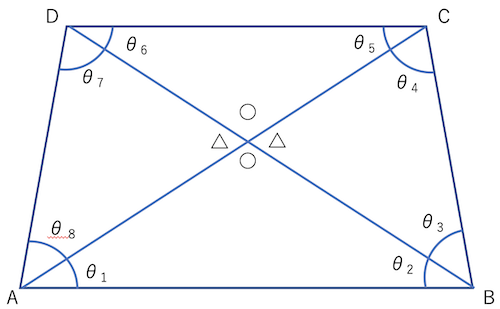
)

下記の表ではわかっているのは測定値だけ！

| 測定値 | 最確値 | 残差 |
| :--- | :--- | :--- |
| θ1(70'00') | M1 | v1(=M1-θ1) |
| θ2 | M2 | v2(=M2-θ2) |
| θ3 | M3 | v3(=M3-θ3) |
| θ4 | M4 | v4(=M4-θ4) |
| θ5 | M5 | v5(=M5-θ5) |
| θ6 | M6 | v6(=M6-θ6) |
| θ7 | M7 | v7(=M7-θ7) |
| θ8 | M8 | v8(=M8-θ8) |

In [1]:
import math
from decimal import Decimal, ROUND_HALF_UP

def dms2deg(dms):
    # 度分秒から度への変換
    h = dms[0]
    m = dms[1]
    s = dms[2]
    deg = Decimal(str(h + (m / 60) + (s / 3600))).quantize(Decimal('0.0001'), rounding=ROUND_HALF_UP)
    return deg

def deg2dms(deg):
    # 度から度分秒への変換
    h = math.modf(deg)[1]
    m = math.modf(math.modf(deg)[0] * 60)[1]
    s = math.modf(math.modf(deg)[0] * 60)[0]*60
    if Decimal(str(s)).quantize(Decimal('0'), rounding=ROUND_HALF_UP) == 60:
        s = 0
        m = m + 1
    if Decimal(str(m)).quantize(Decimal('0'), rounding=ROUND_HALF_UP) == 60:
        m = 0
        h = h + 1
    dms_tap = (int(Decimal(h).quantize(Decimal('0'), rounding=ROUND_HALF_UP)),
                int(Decimal(m).quantize(Decimal('0'), rounding=ROUND_HALF_UP)),
                int(Decimal(s).quantize(Decimal('0'), rounding=ROUND_HALF_UP)))
    return dms_tap

print(dms2deg((30, 25, 40)))
print(deg2dms(30.4278))
print(dms2deg(deg2dms(30.4278)))

30.4278
(30, 25, 40)
30.4278


In [2]:
# 角ABCの測定値
theta1_wk1 = dms2deg((51, 20, 21))
theta2_wk1 = dms2deg((44, 59, 56))
theta3_wk1 = dms2deg((56, 18, 32))
theta4_wk1 = dms2deg((27, 21, 1))
theta5_wk1 = dms2deg((40, 1, 49))
theta6_wk1 = dms2deg((56, 18, 36))
theta7_wk1 = dms2deg((30, 57, 48))
theta8_wk1 = dms2deg((52, 41, 41))

print("三角の和")
print(theta1_wk1 + theta2_wk1 + theta3_wk1 + theta4_wk1)
print(theta5_wk1 + theta6_wk1 + theta7_wk1 + theta8_wk1)
print(theta1_wk1 + theta2_wk1 + theta7_wk1 + theta8_wk1)
print(theta5_wk1 + theta6_wk1 + theta3_wk1 + theta4_wk1)
print("=="*5)
print("三角の差")
print(deg2dms((180 - (theta1_wk1 + theta2_wk1 + theta3_wk1 + theta4_wk1))))
print(deg2dms((180 - (theta5_wk1 + theta6_wk1 + theta7_wk1 + theta8_wk1))))
print(deg2dms((180 - (theta1_wk1 + theta2_wk1 + theta7_wk1 + theta8_wk1))))
print(deg2dms((180 - (theta5_wk1 + theta6_wk1 + theta3_wk1 + theta4_wk1))))

三角の和
179.9973
179.9983
179.9961
179.9995
三角の差
(0, 0, 10)
(0, 0, 6)
(0, 0, 14)
(0, 0, 2)


## 繰り返し処理

In [12]:
from sympy import diff, symbols, solve, cot, sin
from math import log

# 角ABCの測定値
theta1_wk1 = dms2deg((51, 20, 21))
theta2_wk1 = dms2deg((44, 59, 56))
theta3_wk1 = dms2deg((56, 18, 32))
theta4_wk1 = dms2deg((27, 21, 1))
theta5_wk1 = dms2deg((40, 1, 49))
theta6_wk1 = dms2deg((56, 18, 36))
theta7_wk1 = dms2deg((30, 57, 48))
theta8_wk1 = dms2deg((52, 41, 41))

count = 0
while 1:
    count += 1
    print("***"*5)
    print(f"{count}回目の近似計算")
    print("三角の和")
    print(theta1_wk1 + theta2_wk1 + theta3_wk1 + theta4_wk1)
    print(theta5_wk1 + theta6_wk1 + theta7_wk1 + theta8_wk1)
    print(theta1_wk1 + theta2_wk1 + theta7_wk1 + theta8_wk1)
    print(theta5_wk1 + theta6_wk1 + theta3_wk1 + theta4_wk1)
    print("=="*5)
    print("三角の差")
    print(deg2dms((180 - (theta1_wk1 + theta2_wk1 + theta3_wk1 + theta4_wk1))))
    print(deg2dms((180 - (theta5_wk1 + theta6_wk1 + theta7_wk1 + theta8_wk1))))
    print(deg2dms((180 - (theta1_wk1 + theta2_wk1 + theta7_wk1 + theta8_wk1))))
    print(deg2dms((180 - (theta5_wk1 + theta6_wk1 + theta3_wk1 + theta4_wk1))))
    
    if count==5:
        break

    # ラジアンに変換
    theta1 = theta1_wk1 * Decimal(3.141592/180)
    theta2 = theta2_wk1 * Decimal(3.141592/180)
    theta3 = theta3_wk1 * Decimal(3.141592/180)
    theta4 = theta4_wk1 * Decimal(3.141592/180)
    theta5 = theta5_wk1 * Decimal(3.141592/180)
    theta6 = theta6_wk1 * Decimal(3.141592/180)
    theta7 = theta7_wk1 * Decimal(3.141592/180)
    theta8 = theta8_wk1 * Decimal(3.141592/180)

    # 変数を定義
    L1, L2, L3, L4 = symbols("L1 L2 L3 L4")

    # 制約条件1
    # 8𝜆1+(𝑐𝑜𝑡θ1−𝑐𝑜𝑡θ2+𝑐𝑜𝑡θ3−𝑐𝑜𝑡θ4+𝑐𝑜𝑡θ5−𝑐𝑜𝑡θ6+𝑐𝑜𝑡θ7−𝑐𝑜𝑡θ8)𝜆4+(θ1+θ2+θ3+θ4+θ5+θ6+θ7+θ8−2π)
    w1 = (theta1 + theta2 + theta3 + theta4 + theta5 + theta6 + theta7 + theta8 - Decimal(2*3.141592))
    c1 = cot(theta1) - cot(theta2) + cot(theta3) - cot(theta4) + cot(theta5) - cot(theta6) + cot(theta7) - cot(theta8)
    dL1 = 8*L1 + c1*L4 + w1

    # 制約条件2
    # 4𝜆2+(𝑐𝑜𝑡θ1−𝑐𝑜𝑡θ2+𝑐𝑜𝑡θ5−𝑐𝑜𝑡θ6)𝜆4+(θ1+θ2−θ5−θ6)
    w2 = (theta1 + theta2 - theta5 - theta6)
    c2 = cot(theta1) - cot(theta2)  + cot(theta5) - cot(theta6)
    dL2 = 4*L2 + c2*L4 + w2

    # 制約条件3
    # 4𝜆3+(𝑐𝑜𝑡θ3−𝑐𝑜𝑡θ4+𝑐𝑜𝑡θ7−𝑐𝑜𝑡θ8)𝜆4+(θ3+θ4−θ7−θ8)
    w3 = (theta3 + theta4 - theta7 - theta8)
    c3 = cot(theta3) - cot(theta4) + cot(theta7) - cot(theta8)
    dL3 = 4*L3 + c3*L4 + w3

    # 制約条件4
    # (𝑐𝑜𝑡θ1−𝑐𝑜𝑡θ2+𝑐𝑜𝑡θ3−𝑐𝑜𝑡θ4+𝑐𝑜𝑡θ5−𝑐𝑜𝑡θ6+𝑐𝑜𝑡θ7−𝑐𝑜𝑡θ8)𝜆1+(𝑐𝑜𝑡θ1−𝑐𝑜𝑡θ2+𝑐𝑜𝑡θ5−𝑐𝑜𝑡θ6)𝜆2+
    # (𝑐𝑜𝑡θ3−𝑐𝑜𝑡θ4+𝑐𝑜𝑡θ7−𝑐𝑜𝑡θ8)𝜆3+(𝑐𝑜𝑡θ1^2+𝑐𝑜𝑡θ2^2+𝑐𝑜𝑡θ3^2+𝑐𝑜𝑡θ4^2+𝑐𝑜𝑡θ5^2+𝑐𝑜𝑡θ6^2+𝑐𝑜𝑡θ7^2+𝑐𝑜𝑡θ8^2)𝜆4+
    # (𝑙𝑜𝑔𝑠𝑖𝑛θ1−𝑙𝑜𝑔𝑠𝑖𝑛θ2+𝑙𝑜𝑔𝑠𝑖𝑛θ3−𝑙𝑜𝑔𝑠𝑖𝑛θ4+𝑙𝑜𝑔𝑠𝑖𝑛θ5−𝑙𝑜𝑔𝑠𝑖𝑛θ6+𝑙𝑜𝑔𝑠𝑖𝑛θ7−𝑙𝑜𝑔𝑠𝑖𝑛θ8)
    w4 = log(sin(theta1)) - log(sin(theta2)) + log(sin(theta3)) - log(sin(theta4)) + log(sin(theta5)) - log(sin(theta6)) + log(sin(theta7)) - log(sin(theta8))
    c4 = cot(theta1)**2 + cot(theta2)**2 + cot(theta3)**2 + cot(theta4)**2 + cot(theta5)**2 + cot(theta6)**2 + cot(theta7)**2 + cot(theta8)**2
    dL4 = c1*L1 + c2*L2 + c3*L3 + c4*L4 + w4

    # 連立方程式を解く
    res = solve([dL1, dL2, dL3, dL4])
    display(res)

    # 各v(誤差を算出)
    v1 = res[L1] + res[L2] + cot(theta1) * res[L4]
    v2 = res[L1] + res[L2] - cot(theta2) * res[L4]
    v3 = res[L1] + res[L3] + cot(theta3) * res[L4]
    v4 = res[L1] + res[L3] - cot(theta4) * res[L4]
    v5 = res[L1] - res[L2] + cot(theta5) * res[L4]
    v6 = res[L1] - res[L2] - cot(theta6) * res[L4]
    v7 = res[L1] - res[L3] + cot(theta7) * res[L4]
    v8 = res[L1] - res[L3] - cot(theta8) * res[L4]

    # 残差を補正
    theta1_1 = theta1 + v1
    theta2_1 = theta2 + v2
    theta3_1 = theta3 + v3
    theta4_1 = theta4 + v4
    theta5_1 = theta5 + v5
    theta6_1 = theta6 + v6
    theta7_1 = theta7 + v7
    theta8_1 = theta8 + v8

    # データを更新
    theta1_wk1 = theta1_1 / (3.141592/180)
    theta2_wk1 = theta2_1 / (3.141592/180)
    theta3_wk1 = theta3_1 / (3.141592/180)
    theta4_wk1 = theta4_1 / (3.141592/180)
    theta5_wk1 = theta5_1 / (3.141592/180)
    theta6_wk1 = theta6_1 / (3.141592/180)
    theta7_wk1 = theta7_1 / (3.141592/180)
    theta8_wk1 = theta8_1 / (3.141592/180)

***************
1回目の近似計算
三角の和
179.9973
179.9983
179.9961
179.9995
三角の差
(0, 0, 10)
(0, 0, 6)
(0, 0, 14)
(0, 0, 2)


{L1: 9.60432877431548e-6,
 L2: 9.51387506888405e-6,
 L3: -5.14051307575314e-6,
 L4: 1.05539151800901e-6}

***************
2回目の近似計算
三角の和
179.999913615436
180.000086384564
180.000023035567
179.999976964433
三角の差
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)


{L1: 3.24585353362593e-10,
 L2: 2.70893326725889e-7,
 L3: 4.83603222112948e-7,
 L4: 6.81751634636149e-8}

***************
3回目の近似計算
三角の和
179.999994419987
180.000005580013
180.000001487888
179.999998512112
三角の差
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)


{L1: 5.04671080999859e-10,
 L2: 9.27430715746774e-9,
 L3: 4.04298252046198e-8,
 L4: 1.06003567871864e-7}

***************
4回目の近似計算
三角の和
179.999991323797
180.000008676203
180.000002313477
179.999997686523
三角の差
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)


{L1: 3.95510602134220e-11,
 L2: 2.70901724624517e-8,
 L3: 4.87030649526996e-8,
 L4: 8.30702566752851e-9}

***************
5回目の近似計算
三角の和
179.999999320085
180.000000679915
180.000000181297
179.999999818703
三角の差
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)


# 雑

## ラグランジュの未定条数法

### サンプル

In [ ]:
from sympy import diff, symbols, solve, cot, sin
from math import log

# ラジアンに変換
theta1 = dms2deg((51, 20, 21)) * Decimal(3.141592/180)
theta2 = dms2deg((44, 59, 56)) * Decimal(3.141592/180)
theta3 = dms2deg((56, 18, 32)) * Decimal(3.141592/180)
theta4 = dms2deg((27, 21, 1)) * Decimal(3.141592/180)
theta5 = dms2deg((40, 1, 49)) * Decimal(3.141592/180)
theta6 = dms2deg((56, 18, 36)) * Decimal(3.141592/180)
theta7 = dms2deg((30, 57, 48)) * Decimal(3.141592/180)
theta8 = dms2deg((52, 41, 41)) * Decimal(3.141592/180)

# 変数を定義
L1, L2, L3, L4 = symbols("L1 L2 L3 L4")

# 制約条件1
# 8𝜆1+(𝑐𝑜𝑡θ1−𝑐𝑜𝑡θ2+𝑐𝑜𝑡θ3−𝑐𝑜𝑡θ4+𝑐𝑜𝑡θ5−𝑐𝑜𝑡θ6+𝑐𝑜𝑡θ7−𝑐𝑜𝑡θ8)𝜆4+(θ1+θ2+θ3+θ4+θ5+θ6+θ7+θ8−2π)
w1 = (theta1 + theta2 + theta3 + theta4 + theta5 + theta6 + theta7 + theta8 - Decimal(2*3.141592))
c1 = cot(theta1) - cot(theta2) + cot(theta3) - cot(theta4) + cot(theta5) - cot(theta6) + cot(theta7) - cot(theta8)
dL1 = 8*L1 + c1*L4 - w1

# 制約条件2
# 4𝜆2+(𝑐𝑜𝑡θ1−𝑐𝑜𝑡θ2+𝑐𝑜𝑡θ5−𝑐𝑜𝑡θ6)𝜆4+(θ1+θ2−θ5−θ6)
w2 = (theta1 + theta2 - theta5 - theta6)
c2 = cot(theta1) - cot(theta2)  + cot(theta5) - cot(theta6)
dL2 = 4*L2 + c2*L4 - w2

# 制約条件3
# 4𝜆3+(𝑐𝑜𝑡θ3−𝑐𝑜𝑡θ4+𝑐𝑜𝑡θ7−𝑐𝑜𝑡θ8)𝜆4+(θ3+θ4−θ7−θ8)
w3 = (theta3 + theta4 - theta7 - theta8)
c3 = cot(theta3) - cot(theta4) + cot(theta7) - cot(theta8)
dL3 = 4*L3 + c3*L4 - w3

# 制約条件4
# (𝑐𝑜𝑡θ1−𝑐𝑜𝑡θ2+𝑐𝑜𝑡θ3−𝑐𝑜𝑡θ4+𝑐𝑜𝑡θ5−𝑐𝑜𝑡θ6+𝑐𝑜𝑡θ7−𝑐𝑜𝑡θ8)𝜆1+(𝑐𝑜𝑡θ1−𝑐𝑜𝑡θ2+𝑐𝑜𝑡θ5−𝑐𝑜𝑡θ6)𝜆2+
# (𝑐𝑜𝑡θ3−𝑐𝑜𝑡θ4+𝑐𝑜𝑡θ7−𝑐𝑜𝑡θ8)𝜆3+(𝑐𝑜𝑡θ1^2+𝑐𝑜𝑡θ2^2+𝑐𝑜𝑡θ3^2+𝑐𝑜𝑡θ4^2+𝑐𝑜𝑡θ5^2+𝑐𝑜𝑡θ6^2+𝑐𝑜𝑡θ7^2+𝑐𝑜𝑡θ8^2)𝜆4+
# (𝑙𝑜𝑔𝑠𝑖𝑛θ1−𝑙𝑜𝑔𝑠𝑖𝑛θ2+𝑙𝑜𝑔𝑠𝑖𝑛θ3−𝑙𝑜𝑔𝑠𝑖𝑛θ4+𝑙𝑜𝑔𝑠𝑖𝑛θ5−𝑙𝑜𝑔𝑠𝑖𝑛θ6+𝑙𝑜𝑔𝑠𝑖𝑛θ7−𝑙𝑜𝑔𝑠𝑖𝑛θ8)
w4 = log(sin(theta1)) - log(sin(theta2)) + log(sin(theta3)) - log(sin(theta4)) + log(sin(theta5)) - log(sin(theta6)) + log(sin(theta7)) - log(sin(theta8))
c4 = cot(theta1)**2 + cot(theta2)**2 + cot(theta3)**2 + cot(theta4)**2 + cot(theta5)**2 + cot(theta6)**2 + cot(theta7)**2 + cot(theta8)**2
dL4 = c1*L1 + c2*L2 + c3*L3 + c4*L4 - w4

In [ ]:
# 連立方程式を解く
res = solve([dL1, dL2, dL3, dL4])

display(res)

{L1: -9.60432877431548e-6,
 L2: -9.51387506888405e-6,
 L3: 5.14051307575314e-6,
 L4: -1.05539151800901e-6}

In [ ]:
# 各v(誤差を算出)
v1 = res[L1] - res[L2] - cot(theta1) * res[L4]
v2 = res[L1] - res[L2] + cot(theta2) * res[L4]
v3 = res[L1] + res[L3] - cot(theta3) * res[L4]
v4 = res[L1] + res[L3] + cot(theta4) * res[L4]
v5 = res[L1] - res[L2] - cot(theta5) * res[L4]
v6 = res[L1] - res[L2] + cot(theta6) * res[L4]
v7 = res[L1] + res[L3] - cot(theta7) * res[L4]
v8 = res[L1] + res[L3] + cot(theta8) * res[L4]

In [ ]:
# 残差を補正
theta1_1 = theta1 + v1
theta2_1 = theta2 + v2
theta3_1 = theta3 + v3
theta4_1 = theta4 + v4
theta5_1 = theta5 + v5
theta6_1 = theta6 + v6
theta7_1 = theta7 + v7
theta8_1 = theta8 + v8

In [ ]:
theta1_1_wk1 = theta1_1 / (3.141592/180)
theta2_1_wk1 = theta2_1 / (3.141592/180)
theta3_1_wk1 = theta3_1 / (3.141592/180)
theta4_1_wk1 = theta4_1 / (3.141592/180)
theta5_1_wk1 = theta5_1 / (3.141592/180)
theta6_1_wk1 = theta6_1 / (3.141592/180)
theta7_1_wk1 = theta7_1 / (3.141592/180)
theta8_1_wk1 = theta8_1 / (3.141592/180)

# 補正結果を取得
print("三角の和")
print(theta1_1_wk1 + theta2_1_wk1 + theta3_1_wk1 + theta4_1_wk1)
print(theta5_1_wk1 + theta6_1_wk1 + theta7_1_wk1 + theta8_1_wk1)
print(theta1_1_wk1 + theta2_1_wk1 + theta7_1_wk1 + theta8_1_wk1)
print(theta5_1_wk1 + theta6_1_wk1 + theta3_1_wk1 + theta4_1_wk1)
print("=="*5)
print("三角の差")
print(deg2dms((180 - (theta1_1_wk1 + theta2_1_wk1 + theta3_1_wk1 + theta4_1_wk1))))
print(deg2dms((180 - (theta5_1_wk1 + theta6_1_wk1 + theta7_1_wk1 + theta8_1_wk1))))
print(deg2dms((180 - (theta1_1_wk1 + theta2_1_wk1 + theta7_1_wk1 + theta8_1_wk1))))
print(deg2dms((180 - (theta5_1_wk1 + theta6_1_wk1 + theta3_1_wk1 + theta4_1_wk1))))

三角の和
179.996689433549
179.997864503624
179.995620734621
179.998933202553
三角の差
(0, 0, 12)
(0, 0, 8)
(0, 0, 16)
(0, 0, 4)
